In [5]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

In [4]:
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl


In [6]:
df = pd.read_csv( 'ex2data1.txt' )
data_points = df.to_numpy()

In [7]:
X1 = data_points[:,:1]
X2 = data_points[:,1:2]
Y = data_points[:,2:]

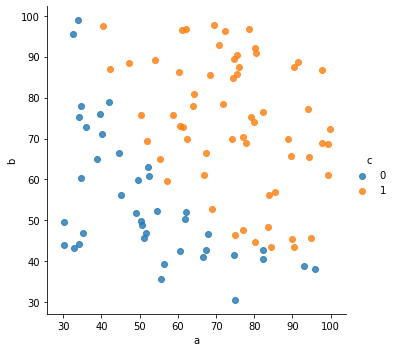

In [8]:
import seaborn as sns
sns.lmplot(x='a', y='b', hue='c',fit_reg=False, data=df)

In [91]:
#hypthesis and y
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [92]:
m1 = 0
m2 = 0
c = 0

L = 0.0008  
epochs = 10000
n = float(len(X1))

cost_hist = []
theta_hist = []
pred_hist = []

for i in range(epochs): 

    y_hat = sigmoid(m1*X1+ m2*X2 + c)

    D_m1 = (-1/n) * sum(X1 * (Y - y_hat))
    D_m2 = (-1/n) * sum(X2 * (Y - y_hat))
    D_c = (-1/n) * sum(Y - y_hat)
    
    m1 = m1 - L * D_m1
    m2 = m2 - L * D_m2
    c = c - L * D_c
    
    cost_hist.append(cost(y_hat, Y))
    theta_hist.append([m1[0], m2[0],c[0]])
    #pred_hist.append([[-3,3],[ (m1*3+  m2*3 + c)[0], (m1*-3+ m2*-3 + c)[0]]] )
    
theta_hist = np.asarray(theta_hist)
cost_hist = np.asarray(cost_hist)

In [93]:
m1, m2, c

(array([0.01418579]), array([0.00465379]), array([-0.53972499]))

In [94]:
y_bin = []
for i in y_hat:
    if i > 0.6:
        y_bin.append([1])
    else:
        y_bin.append([0])
y_bin = np.asarray(y_bin)

In [95]:
data_points_pred = np.hstack((data_points,y_bin))
pred = pd.DataFrame({'a': data_points_pred[:, 0], 'b': data_points_pred[:, 1], 'c': data_points_pred[:, 2], 'd': data_points_pred[:, 3]})

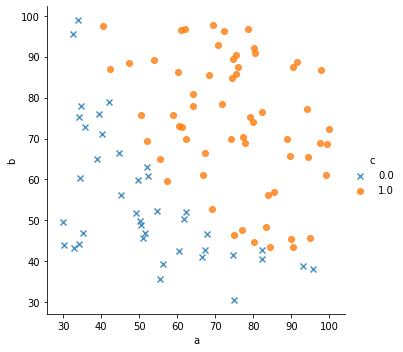

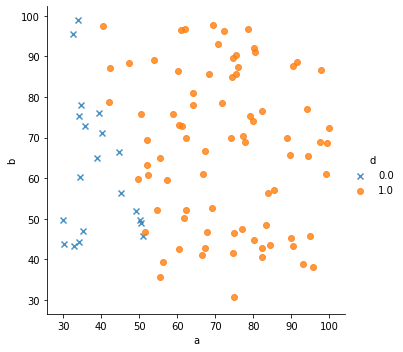

In [96]:
import seaborn as sns
sns.lmplot(x='a', y='b', hue='c', markers=['x', 'o'],fit_reg=False, data=pred)
sns.lmplot(x='a', y='b', hue='d', markers=['x', 'o'],fit_reg=False, data=pred)

In [97]:
correct = 0
for i in data_points_pred[:, 2::]:
    if i[0] == i[1]:
        correct+=1
print("accuracy {:.5}".format(correct/len(data_points_pred)))

accuracy 0.8


# Regularization

In [119]:
df = pd.read_csv( 'ex2data2.txt' )
data_points = df.to_numpy()

In [120]:
X1 = data_points[:,:1]
X2 = data_points[:,1:2]
Y = data_points[:,2:]

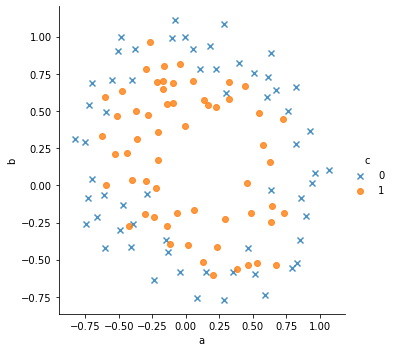

In [121]:
sns.lmplot(x='a', y='b', hue='c', markers=['x', 'o'],fit_reg=False, data=df)

In [122]:
def mapFeatures(x1, x2, degree):
    result = np.ones((len(x1),1))
    for i in range(1,degree+1):
        for j in range(i+1):
            features = (x1**(i-j) * x2**j).reshape(len(x1),1)
            result = np.hstack((result, features))
    return result

In [102]:
X = mapFeatures(X1, X2, 6)

In [103]:
len(X[0])

28

In [104]:
#hypthesis and y
def cost(h, y, theta):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + ((0.02)*(sum(theta)))/2

def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [123]:
theta = np.random.rand(28,1)

L = 0.0008  
epochs = 10000
n = float(len(X1))

cost_hist = []
theta_hist = []
pred_hist = []

lambdaa = 0.02

for i in range(epochs): 

    y_hat = sigmoid(X@theta)
    D_m1 = np.asarray(([((-1/n) * sum(((Y - y_hat).T@X))) + (lambdaa * sum(theta))])).T
    theta = theta - (L * D_m1)

In [124]:
y_bin = []
for i in y_hat:
    if i > 0.5:
        y_bin.append([1])
    else:
        y_bin.append([0])
y_bin = np.asarray(y_bin)

In [125]:
correct = 0
for i in data_points_pred[:, 2::]:
    if i[0] == i[1]:
        correct+=1
print("accuracy {}".format(correct/len(data_points_pred)))

accuracy 0.8


In [ ]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)